# Malis Project
## La Liga Predictions

### Briefing

This project will try to predict the winner between two different football teams, based on the database containing the results and parameters from the Spanish League "La Liga", from both the 2020-2021 and 2021-2022 period. The database features are as follows:

Player = Full name of the player

"#" = Shirt Number.

Nation = Nationality of the player

Pos = Position played in the match

Age = Age on date of the match (YY-DDD)

Min = Minutes Played

Gls = Goals Scored or allowed

Ast = Assists

PK = Penalty kicks made

PKatt = Penalty kicks attempted

Sh = Shots total (does not include penalty kicks)

SoT = Shots on target (does not include penalty kicks)

CrdY = Yellow cards

CrdR = Red cards

Touches = # of times the player touched the ball

Press = # of times applied pressure to opposing player who is receiving, carrying or releasing the ball

Tkl = # of players tackled

Int = Interceptions

Blocks = # of times blocking the ball by standing on its path

xG = Expected goals (include penalty kicks but don't include penalty shootouts)

npxG = Non-penalty expected goals

xA = xG Assisted (xG which follows a pass that assists a shot)

SCA = Shot creating actions

GCA = Goal creating actions

Cmp = Passes completed

Att = Passes attempted

Cmp% = Pass completition percentage

Prog = Progressive passes

Carries = # of times the player controlled the ball with their feet

Prog.1 = Progressive Passes

Succ = Dribbles completed Successfully

Att.1 = Dribbles attempted

Team = Name of the team

Opponent_Team = Name of the oponent team

Match = Lineup of the team's names for that particular match

Date = Date of the encounter

Stadium = Hosting stadium for the match

Crowd = # of spectators on the stadium

## Exploratory data analysis

In [16]:
#Importing required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Just in case
import warnings
warnings.filterwarnings("ignore")


dfx = pd.read_excel("season2020-2021Spain.xlsx")
Crowd = dfx['Crowd']
New_Crowd = []
for i in Crowd : 
    New_Crowd.append(0)
dfx["Crowd"] = pd.DataFrame(np.array(New_Crowd))
df = dfx
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

#Visualizing the information of the raw DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         12379 non-null  object 
 1   #              11619 non-null  float64
 2   Nation         11619 non-null  object 
 3   Pos            11619 non-null  object 
 4   Age            11619 non-null  object 
 5   Min            12367 non-null  float64
 6   Gls            12379 non-null  int64  
 7   Ast            12379 non-null  int64  
 8   PK             12379 non-null  int64  
 9   PKatt          12379 non-null  int64  
 10  Sh             12379 non-null  int64  
 11  SoT            12379 non-null  int64  
 12  CrdY           12379 non-null  int64  
 13  CrdR           12379 non-null  int64  
 14  Touches        12367 non-null  float64
 15  Press          12367 non-null  float64
 16  Tkl            12367 non-null  float64
 17  Int            12379 non-null  int64  
 18  Blocks

In [17]:
#Visualizing the DF head (20 first elements)
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [18]:
#There are some rows that contain NA values (row #16 contains the summed up stats of the team, 
# we will proceed to drop values with NA's)

df = df.dropna()
df.head(5)

,Player,#,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,...,Carries,Prog.1,Succ,Att.1,Team,Opponent_Team,Match,Date,Stadium,Crowd
0,Jorge Molina,23.0,es ESP,FW,39-000,50.0,0,0,0,0,...,9.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
1,Maxime Gonalons,4.0,fr FRA,"DM,CM",32-043,40.0,0,0,0,0,...,9.0,0.0,1.0,1.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
2,Roberto Soldado,9.0,es ESP,FW,35-330,80.0,2,0,0,0,...,7.0,1.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
3,Carlos Neva,15.0,es ESP,WB,24-314,10.0,0,0,0,0,...,0.0,0.0,0.0,0.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0
4,Darwin Machís,11.0,ve VEN,"LM,LW",28-074,70.0,0,0,0,0,...,10.0,3.0,0.0,2.0,Granada,Eibar,Granada_vs_Eibar,2021-04-22,"Estadio Nuevo Los Cármenes, Granada",0


In [19]:
players = pd.read_csv('fifa20-21.csv')

modified_teams =  {
 'Deportivo Alavés': 'Alavés',
 'Cádiz CF': 'Cádiz',
 'Getafe CF': 'Getafe',
 'Real Betis': 'Real Betis',
 'Sevilla FC': 'Sevilla',
 'Granada CF': 'Granada',
 'Valencia CF': 'Valencia',
 'Elche CF': 'Elche',
 'Real Sociedad': 'Real Sociedad',
 'SD Eibar': 'Eibar',
 'Athletic Club de Bilbao': 'Athletic Club',
 'Atlético Madrid': 'Atlético Madrid',
 'CA Osasuna': 'Osasuna',
 'RC Celta': 'Celta Vigo',
 'SD Huesca': 'Huesca',
 'Real Madrid': 'Real Madrid',
 'Levante UD': 'Levante',
 'Real Valladolid CF': 'Valladolid',
 'FC Barcelona': 'Barcelona',
 'Villarreal CF': 'Villarreal'}
ligaPlayers = players[players["Club"].isin(modified_teams.keys())]
clubs = []
for club in ligaPlayers["Club"]:
    clubs.append(modified_teams[club])
ligaPlayers["Club"]= clubs

In [20]:
ligaPlayers # scores of la Liga players in Fifa 21. 

,Short Name,Full Name,Country,Age,Overall Rating,Potential,Club,Height,Weight,Foot,Best Position,Value,Wage,VIT,TIR,PAS,DRI,DEF,PHY
19,Andrés Fernández,Andrés Eduardo Fernández Moreno,Spain,33,77,77,Huesca,187.96,82.100219,Right,GK,3400000.0,19000.0,80,75,68,78,56,76
60,Clerc,Carlos Clerc Martínez,Spain,28,76,76,Levante,182.88,68.946040,Left,LB,7000000.0,22000.0,87,58,71,74,69,74
67,Pere Pons,Pere Pons Riera,Spain,27,75,75,Alavés,177.80,69.853225,Right,CM,6000000.0,22000.0,64,62,72,74,69,70
72,Zaldúa,Joseba Zaldúa Bengoetxea,Spain,28,79,79,Real Sociedad,175.26,68.946040,Right,RB,16000000.0,32000.0,69,34,67,66,78,76
78,Melero,Gonzalo Melero Manzanares,Spain,26,76,77,Levante,182.88,77.110703,Right,CM,9000000.0,24000.0,65,76,72,72,72,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16083,D. Foulquier,Dimitri Foulquier,France,27,77,77,Granada,182.88,78.017888,Right,RB,10000000.0,25000.0,79,63,70,74,74,77
16101,David García,David García Zubiria,Spain,26,76,79,Osasuna,185.42,72.121187,Right,CB,8500000.0,27000.0,55,37,63,64,76,76
16124,Jorge Molina,Jorge Molina Vidal,Spain,38,78,78,Granada,187.96,72.121187,Right,ST,4800000.0,24000.0,40,82,67,69,41,72
16162,Toni Herrero,Toni Herrero Oliva,Spain,19,64,80,Levante,177.80,73.935556,Left,LM,1500000.0,3000.0,77,46,60,66,55,58


In [21]:
#Visualizing the DF's feature informtion to spot nulls/NA's
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11498 entries, 0 to 12377
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         11498 non-null  object 
 1   #              11498 non-null  float64
 2   Nation         11498 non-null  object 
 3   Pos            11498 non-null  object 
 4   Age            11498 non-null  object 
 5   Min            11498 non-null  float64
 6   Gls            11498 non-null  int64  
 7   Ast            11498 non-null  int64  
 8   PK             11498 non-null  int64  
 9   PKatt          11498 non-null  int64  
 10  Sh             11498 non-null  int64  
 11  SoT            11498 non-null  int64  
 12  CrdY           11498 non-null  int64  
 13  CrdR           11498 non-null  int64  
 14  Touches        11498 non-null  float64
 15  Press          11498 non-null  float64
 16  Tkl            11498 non-null  float64
 17  Int            11498 non-null  int64  
 18  Blocks

In [22]:
#Regrouping the DF to spot the teams confronting each other
df_versus = df.groupby(["Match","Date","Team","Opponent_Team","Stadium","Crowd"], as_index=False)["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR","Touches",
                                                         "Press","Tkl", "Int", "Blocks"].sum()

df_versus

#We now need to create an additional column for the results of each encounter (Win/Loss/Draw).

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,Alavés,Athletic Club,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,Athletic Club,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,Alavés,Atlético Madrid,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,Atlético Madrid,Alavés,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0
4,Alavés_vs_Barcelona,2020-10-31,Alavés,Barcelona,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,Villarreal,Sevilla,"4,800",0,4,2,0,0,12,5,0,0,524.0,120.0,15.0,6,16.0
756,Villarreal_vs_Valencia,2020-10-18,Valencia,Villarreal,"Estadio de la Cerámica, Villarreal",0,1,1,0,0,11,3,1,0,497.0,91.0,14.0,4,23.0
757,Villarreal_vs_Valencia,2020-10-18,Villarreal,Valencia,"Estadio de la Cerámica, Villarreal",0,2,0,1,1,15,5,4,1,719.0,94.0,10.0,3,17.0
758,Villarreal_vs_Valladolid,2020-11-02,Valladolid,Villarreal,"Estadio de la Cerámica, Villarreal",0,0,0,0,0,11,1,3,0,497.0,121.0,22.0,4,14.0


In [23]:
# index teams 
set_of_teams = set(df_versus["Team"])
team_index = {}
i=1
for team in set_of_teams : 
    team_index[team]=i
    i+=1
team_index

{'Levante': 1,
 'Barcelona': 2,
 'Valladolid': 3,
 'Huesca': 4,
 'Celta Vigo': 5,
 'Valencia': 6,
 'Real Madrid': 7,
 'Villarreal': 8,
 'Getafe': 9,
 'Osasuna': 10,
 'Elche': 11,
 'Cádiz': 12,
 'Real Sociedad': 13,
 'Eibar': 14,
 'Granada': 15,
 'Real Betis': 16,
 'Atlético Madrid': 17,
 'Alavés': 18,
 'Athletic Club': 19,
 'Sevilla': 20}

In [24]:
# update the database considering the indexes of teams : 
teams = df_versus["Team"]
opponent_teams = df_versus["Opponent_Team"]
team_indexes = []
opponent_team_indexes = []
for team in teams : 
    team_indexes.append(team_index[team])
for team in opponent_teams : 
    opponent_team_indexes.append(team_index[team])
df_versus["Team"] = pd.DataFrame(np.array(team_indexes))
df_versus["Opponent_Team"] = pd.DataFrame(np.array(opponent_team_indexes))

df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks
0,Alavés_vs_Athletic_Club,2020-10-04,18,19,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0
1,Alavés_vs_Athletic_Club,2020-10-04,19,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0
2,Alavés_vs_Atlético_Madrid,2021-01-03,18,17,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0
3,Alavés_vs_Atlético_Madrid,2021-01-03,17,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0
4,Alavés_vs_Barcelona,2020-10-31,18,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0


In [25]:
# Convert the type of dates from Str to Date : 
from datetime import * 
dates = []
for i in df_versus['Date']:
    date_str = str(i).replace("-","/")
    date_obj = datetime.strptime(date_str, '%Y/%m/%d').date()
    dates.append(date_obj)
df_versus['Date']= pd.DataFrame(np.array(dates))

In [26]:
#Generating the Label column (Results)

matches = pd.DataFrame(df_versus.Match.drop_duplicates())
matches = matches.reset_index(drop=True)

test = []

for i in matches.Match:
    i = str(i)
    oi = df_versus.loc[df_versus["Match"]==i]
    oi = oi.reset_index(drop=True)
    b = (oi.Gls[0])-(oi.Gls[1]) #Goals - Goals of the other team
    if b < 0:
        a = 0 #Assigned to losers
        b = 1 #Assigned to winners
        test.append(a)
        test.append(b)
    elif b > 0:
        a = 1 #Assigned to winners
        b = 0 #Assigned to losers
        test.append(a)
        test.append(b)
    else:
        a = 2 #Assigned when result is a draw
        b = 2 #Assigned when result is a draw
        test.append(a)
        test.append(b)        

        
test = pd.DataFrame(test)

df_versus["Results"] = test


#Visualizing the DF with the "Results" Column
df_versus.head(5)

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results
0,Alavés_vs_Athletic_Club,2020-10-04,18,19,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,8,4,2,1,453.0,124.0,9.0,5,20.0,1
1,Alavés_vs_Athletic_Club,2020-10-04,19,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,8,1,3,0,584.0,105.0,13.0,0,16.0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,18,17,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,4,1,0,1,510.0,123.0,10.0,12,16.0,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,17,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,8,4,2,0,673.0,89.0,20.0,12,18.0,1
4,Alavés_vs_Barcelona,2020-10-31,18,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0,0,0,4,3,4,1,373.0,222.0,24.0,10,25.0,2


In [27]:
#Adding the Home/Away Column

o = []
for i,j in zip(df_versus.Match,df_versus.Team):
    a = i.split("_vs")
    a = a[0].replace("_"," ")
    if a == j:
        a=1 # 1 is Home
    else:
        a=0 # 0 is Away
    o.append(a)

test = pd.DataFrame(o)
df_versus["Home/Away"] = test

#Visualizing the updated DF
df_versus

,Match,Date,Team,Opponent_Team,Stadium,Crowd,Gls,Ast,PK,PKatt,...,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,Results,Home/Away
0,Alavés_vs_Athletic_Club,2020-10-04,18,19,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,1,0,0,...,4,2,1,453.0,124.0,9.0,5,20.0,1,0
1,Alavés_vs_Athletic_Club,2020-10-04,19,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,...,1,3,0,584.0,105.0,13.0,0,16.0,0,0
2,Alavés_vs_Atlético_Madrid,2021-01-03,18,17,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,0,0,0,0,...,1,0,1,510.0,123.0,10.0,12,16.0,0,0
3,Alavés_vs_Atlético_Madrid,2021-01-03,17,18,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,2,2,0,0,...,4,2,0,673.0,89.0,20.0,12,18.0,1,0
4,Alavés_vs_Barcelona,2020-10-31,18,2,"Estadio de Mendizorroza, Vitoria-Gasteiz",0,1,0,0,0,...,3,4,1,373.0,222.0,24.0,10,25.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,Villarreal_vs_Sevilla,2021-05-16,8,20,"4,800",0,4,2,0,0,...,5,0,0,524.0,120.0,15.0,6,16.0,1,0
756,Villarreal_vs_Valencia,2020-10-18,6,8,"Estadio de la Cerámica, Villarreal",0,1,1,0,0,...,3,1,0,497.0,91.0,14.0,4,23.0,0,0
757,Villarreal_vs_Valencia,2020-10-18,8,6,"Estadio de la Cerámica, Villarreal",0,2,0,1,1,...,5,4,1,719.0,94.0,10.0,3,17.0,1,0
758,Villarreal_vs_Valladolid,2020-11-02,3,8,"Estadio de la Cerámica, Villarreal",0,0,0,0,0,...,1,3,0,497.0,121.0,22.0,4,14.0,0,0


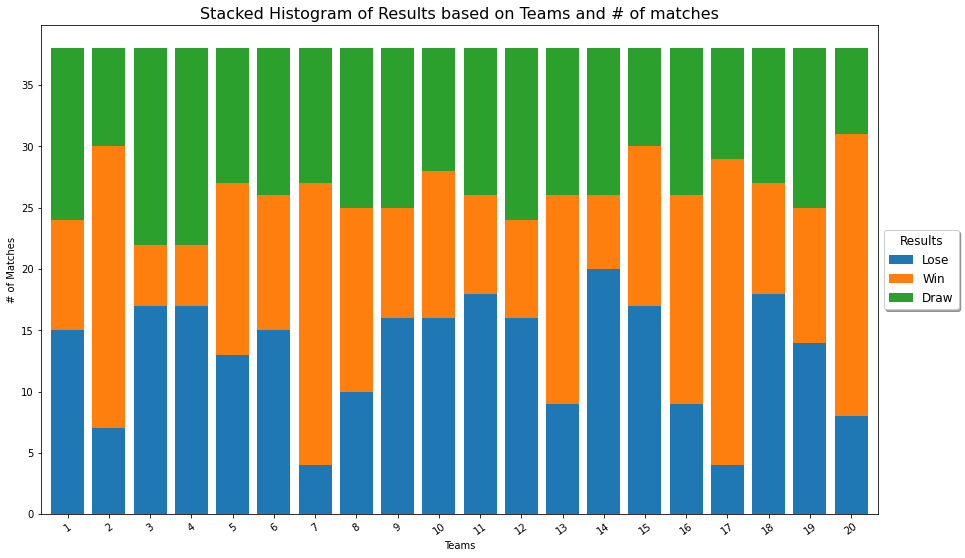

In [29]:
#Visualizing the Stacked Histogram (Using df.plot())
df_plot = df_versus.groupby(["Team", "Results"]).size().reset_index().pivot(columns="Results" , 
                                                                            index="Team", values=0)
df_plot.plot(kind="bar", stacked=True, figsize =(15,9),
rot=35,width=.8)
plt.title("Stacked Histogram of Results based on Teams and # of matches",size=16)
plt.legend(["Lose","Win","Draw"], title="Results",loc="center left",
bbox_to_anchor=(1, 0, 0.5, 1),fontsize = "large",
shadow = True,title_fontsize="large")

plt.xlabel("Teams")
plt.ylabel("# of Matches")
plt.show()


Data Processing : 

In [30]:
def average_last_3(feature):
    # do the average of the "feature" in the 3 last matches of the team 
    media = []
    for date, team in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<date]
        oi = oi.loc[oi["Team"]==team]
        oi= oi.reset_index(drop=True)
        oi = oi[-3:]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["last_3_avrg_"+feature] = pd.DataFrame(np.array(media))   

def average(feature):
    # do the average of the "feature" in all the matches of the team before the match going to play it
    media = []
    for i, j in zip(df_versus["Date"],df_versus["Team"]):
        oi = df_versus.loc[df_versus["Date"]<i]
        oi = oi.loc[oi["Team"]==j]
        oi = oi[feature].mean()
        media.append(oi)
    df_versus["avrg_"+feature] = pd.DataFrame(np.array(media))


In [31]:
# for each feature, apply the average of the last 3 matches 
features_average = df_versus.drop(columns=['Match','Date','Results','Team','Opponent_Team','Home/Away','Stadium','Crowd'])

for feature in features_average.columns:
    average_last_3(feature)
    average(feature)

df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                760 non-null    object 
 1   Date                 760 non-null    object 
 2   Team                 760 non-null    int64  
 3   Opponent_Team        760 non-null    int64  
 4   Stadium              760 non-null    object 
 5   Crowd                760 non-null    int64  
 6   Gls                  760 non-null    int64  
 7   Ast                  760 non-null    int64  
 8   PK                   760 non-null    int64  
 9   PKatt                760 non-null    int64  
 10  Sh                   760 non-null    int64  
 11  SoT                  760 non-null    int64  
 12  CrdY                 760 non-null    int64  
 13  CrdR                 760 non-null    int64  
 14  Touches              760 non-null    float64
 15  Press                760 non-null    flo

In [32]:
# delete the features for the specefic match 
df_versus = df_versus.drop(columns=["Gls","Ast", "PK", "PKatt", "Sh", "SoT", "CrdY", "CrdR",
    "Touches","Press","Tkl", "Int", "Blocks"])
df_versus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Match                760 non-null    object 
 1   Date                 760 non-null    object 
 2   Team                 760 non-null    int64  
 3   Opponent_Team        760 non-null    int64  
 4   Stadium              760 non-null    object 
 5   Crowd                760 non-null    int64  
 6   Results              760 non-null    int64  
 7   Home/Away            760 non-null    int64  
 8   last_3_avrg_Gls      740 non-null    float64
 9   avrg_Gls             740 non-null    float64
 10  last_3_avrg_Ast      740 non-null    float64
 11  avrg_Ast             740 non-null    float64
 12  last_3_avrg_PK       740 non-null    float64
 13  avrg_PK              740 non-null    float64
 14  last_3_avrg_PKatt    740 non-null    float64
 15  avrg_PKatt           740 non-null    flo

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

clf_random = RandomForestClassifier()
clf_logistic = LogisticRegression()
clf_svm = svm.SVC()
clf_KNN = KNeighborsClassifier()

X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
acc_random = []
acc_KNN = []
acc_logistic = []
acc_svm = []
for i in range(2000):
    # In the first step we will split the data in training and remaining dataset
    X_train, X_remain, Y_train, Y_remain = train_test_split(X, Y, train_size=0.80)

    # We split the remaining dataset between valid and test dataset
    X_valid, X_test, y_valid, y_test = train_test_split(X_remain,Y_remain, test_size=0.5)
    clf_random.fit(X_train, Y_train)
    y_hat_random = clf_random.predict(X_test)
    acc_random.append(accuracy_score(y_test,y_hat_random)) 

    clf_KNN.fit(X_train, Y_train)
    y_hat_KNN = clf_KNN.predict(X_test)
    acc_KNN.append(accuracy_score(y_test,y_hat_KNN)) 

    clf_logistic.fit(X_train, Y_train)
    y_hat_logistic = clf_logistic.predict(X_test)
    acc_logistic.append(accuracy_score(y_test,y_hat_logistic))

    clf_svm.fit(X_train, Y_train)
    y_hat_svm = clf_svm.predict(X_test)
    acc_svm.append(accuracy_score(y_test,y_hat_svm))  

print("Random Forest : ", np.array(acc_random).mean())
print("KNN : ",np.array(acc_KNN).mean())
print("Logistic Regression : ",np.array(acc_logistic).mean())
print("SVM : ", np.array(acc_svm).mean())


Random Forest :  0.41175
KNN :  0.4094342105263158
Logistic Regression :  0.42676315789473684
SVM :  0.4465526315789474


In [ ]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# clf_logistic = LogisticRegression()
# clf_random = RandomForestClassifier()
# clf_KNN = KNeighborsClassifier()
# clf_svm = svm.SVC()


X = df_versus.drop(columns=['Date','Match','Results','Stadium','Crowd'])
Y = df_versus['Results']
'''
Get rid of Naan values and infinite values to avoid the ValueError : 
Input contains Naan, infinity or a value too large for dtype('float64')

'''
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# acc_random = []
# acc_KNN = []
# acc_logistic = []
# acc_svm = []

#Splitting the dataset in train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

#Feature scaling
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Creating a model array variable
models = [LogisticRegression(max_iter= 1000, multi_class = 'multinomial'),
RandomForestClassifier(), svm.SVC(), KNeighborsClassifier(), GradientBoostingClassifier()]

names = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN', 'Gradient Boost']

#Running all tentative models and compute accuracies and elapsed times.
for model, name in zip(models, names):
    start = time.time()
    scores = cross_val_score(model, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(name, ":", "%0.3f, +- %0.3f" % (scores.mean(), scores.std()), " - Elapsed time: ", time.time() - start)

Logistic Regression : 0.449, +- 0.024  - Elapsed time:  0.1490025520324707
Random Forest : 0.434, +- 0.040  - Elapsed time:  0.9569981098175049
SVM : 0.430, +- 0.040  - Elapsed time:  0.07599639892578125
KNN : 0.421, +- 0.035  - Elapsed time:  0.03701329231262207
Gradient Boost : 0.417, +- 0.039  - Elapsed time:  3.426995038986206


 Clf result : 0.418, +/- 0.039 N_features : 5
 Clf result : 0.419, +/- 0.032 N_features : 6
 Clf result : 0.414, +/- 0.037 N_features : 7
 Clf result : 0.410, +/- 0.037 N_features : 8
 Clf result : 0.406, +/- 0.028 N_features : 9
 Clf result : 0.410, +/- 0.035 N_features : 10
 Clf result : 0.423, +/- 0.033 N_features : 11
 Clf result : 0.421, +/- 0.041 N_features : 12
 Clf result : 0.418, +/- 0.041 N_features : 13
 Clf result : 0.423, +/- 0.032 N_features : 14
 Clf result : 0.416, +/- 0.036 N_features : 15
 Clf result : 0.410, +/- 0.037 N_features : 16
 Clf result : 0.424, +/- 0.051 N_features : 17
 Clf result : 0.423, +/- 0.051 N_features : 18
 Clf result : 0.431, +/- 0.053 N_features : 19
 Clf result : 0.434, +/- 0.053 N_features : 20
 Clf result : 0.438, +/- 0.049 N_features : 21
 Clf result : 0.426, +/- 0.051 N_features : 22
 Clf result : 0.434, +/- 0.047 N_features : 23
 Clf result : 0.416, +/- 0.061 N_features : 24
 Clf result : 0.419, +/- 0.061 N_features : 25
 Clf result : 0.43

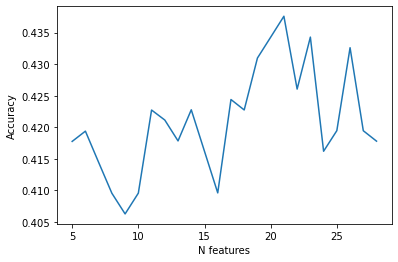

In [ ]:
from sklearn.feature_selection import RFE

#As logistic regression obtained the highest overall accuracy, we will prroceed further to experiment with it to optimize our results

acc_results = []
n_features = []

#Selecting LogReg as the best classifier for our data
clf = LogisticRegression(max_iter =2000, multi_class = 'multinomial')

#Implementing recursive feature elimination on 
for i in range(5, len(X.columns)):
    rfe = RFE(estimator = clf, n_features_to_select = i, step=1)
    rfe.fit(X, Y)
    X_temp = rfe.transform(X)

    np.random.seed(2022)

    X_train, X_test, y_train, y_test = train_test_split(X_temp,Y, test_size = 0.2)

    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)

    start = time.time()
    scores = cross_val_score(clf, X_train, y_train ,scoring= 'accuracy', cv=5)
    print(" Clf result :", "%0.3f, +/- %0.3f" % (scores.mean(), scores.std()), 'N_features :', i)
    acc_results.append(scores.mean())
    n_features.append(i)

plt.plot(n_features, acc_results)
plt.ylabel('Accuracy')
plt.xlabel('N features')
plt.show()

In [ ]:
X.head()

,Team,Home/Away,last_3_avrg_Gls,avrg_Gls,last_3_avrg_Ast,avrg_Ast,last_3_avrg_PK,avrg_PK,last_3_avrg_PKatt,avrg_PKatt,...,avrg_Touches,last_3_avrg_Press,avrg_Press,last_3_avrg_Tkl,avrg_Tkl,last_3_avrg_Int,avrg_Int,last_3_avrg_Blocks,avrg_Blocks,Opponent_Team
0,18,1,0.666667,0.500000,0.333333,0.250000,0.000000,0.000000,0.000000,0.000000,...,478.250000,144.333333,156.000000,17.000000,19.250000,7.666667,6.000000,14.666667,15.250000,12
1,12,0,0.666667,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,...,600.666667,125.333333,125.333333,12.000000,12.000000,4.333333,4.333333,12.000000,12.000000,18
2,18,1,1.666667,0.875000,1.000000,0.500000,0.333333,0.187500,0.666667,0.250000,...,474.562500,182.666667,145.375000,16.000000,16.375000,8.000000,8.562500,19.666667,16.125000,13
3,13,0,0.666667,1.857143,0.666667,1.500000,0.000000,0.142857,0.000000,0.285714,...,677.357143,127.333333,130.214286,19.000000,17.357143,9.333333,9.357143,17.666667,16.142857,18
4,18,1,1.333333,0.714286,1.000000,0.571429,0.000000,0.000000,0.333333,0.142857,...,504.000000,170.333333,158.285714,16.666667,16.857143,8.333333,7.000000,17.333333,16.571429,4
